**STEPS TAKEN IN THE PROJECT**

- **Data Extraction** *(Tools used: SQL)*

    - SQL queiries used in extracting data.
    
    - Extracting data for "Kathmandu" city only.
- **Data Cleaning** *(Tools used: Python, Pandas)*

    - Handling NUll(NAN/NA) values 
    
- **Data Exploration** *(Tools used: Python, Pandas, Scipy)*

    - Calculating the moving averages with 10 years as a window.
- **Data Visualization** *(Tools used: Python, Matplotlib, Seaborn)*

    - Plotting the line-graphs between global avgerage  and moving average temperature.
    
    - Plotting the graphs between Kathmandu average temperature and it's moving average.
    
    - Plotting the graphs between global moving average and kathmandu moving average.
    
    - Plotting the linear trend of the moving averages.
- **Observations**

## Data Extraction

### SQL Queries used in extracting data

In [ ]:
#Extract all data from city_data table;
SELECT * FROM city_data;  #Data for kathmandu city is extracted later on using pandas

#Extracct all data from city_list table;
SELECT * FROM city_list;

#Extract all data from global_data list;
SELECT * FROM globl_data;

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression

In [3]:
filepath = '~/Documents/udacity/data-analyst/data-weather'
city_list = pd.read_csv(os.path.join(filepath, 'city_list.csv'), delimiter=',') 
city_data = pd.read_csv(os.path.join(filepath,'city_data.csv'), delimiter=',')
global_data = pd.read_csv(os.path.join(filepath, 'global_data.csv'), delimiter=',')

### Extracting data for my city 'Kathmandu' only

In [4]:
data_ktm = city_data[city_data["city"] == "Kathmandu"]

## Data Cleaning

### Handling Null values 

In [5]:
def check_null(data):
    for col in data.columns:
        isna_df = data[col].isna()
        print("Total null values in {} is {} ".format(col, sum(isna_df)))

In [6]:
print("\n Checking Null values for 'global_data'")
check_null(global_data)

print("\n Checking Null Values for 'city_data'" )
check_null(city_data)

print("\n Checking Null Values for 'city_list'" )
check_null(city_list)


 Checking Null values for 'global_data'
Total null values in year is 0 
Total null values in avg_temp is 0 

 Checking Null Values for 'city_data'
Total null values in year is 0 
Total null values in city is 0 
Total null values in country is 0 
Total null values in avg_temp is 2547 

 Checking Null Values for 'city_list'
Total null values in city is 0 
Total null values in country is 0 


In [7]:
isna_df = city_data["avg_temp"].isna()

In [8]:
city_null_temp = city_data[isna_df]["city"].unique()

In [9]:
'Kathmandu' in city_null_temp

True

In [10]:
data_ktm[data_ktm["avg_temp"].isna()]

,year,city,country,avg_temp
30888,1808,Kathmandu,Nepal,NaN
30889,1809,Kathmandu,Nepal,NaN
30890,1810,Kathmandu,Nepal,NaN
30891,1811,Kathmandu,Nepal,NaN
30892,1812,Kathmandu,Nepal,NaN
30938,1858,Kathmandu,Nepal,NaN
30939,1859,Kathmandu,Nepal,NaN
30940,1860,Kathmandu,Nepal,NaN
30941,1861,Kathmandu,Nepal,NaN
30942,1862,Kathmandu,Nepal,NaN


In [11]:
data_ktm.describe()

,year,avg_temp
count,218.000000,206.000000
mean,1904.500000,14.663592
std,63.075352,0.539040
min,1796.000000,13.250000
25%,1850.250000,14.370000
50%,1904.500000,14.655000
75%,1958.750000,15.005000
max,2013.000000,16.560000


__Replacing the NAN records of 'avg_temp' by the mean of avg_temp__

In [12]:
values = {"avg_temp" : np.mean(data_ktm["avg_temp"])}
df_ktm = data_ktm.fillna(value = values).copy()

In [13]:
# checking whether the NAN value fwas illed in the 'avg_temp'column or not
df_ktm[(df_ktm["year"] >= 1808) & (df_ktm["year"] <= 1812)]

,year,city,country,avg_temp
30888,1808,Kathmandu,Nepal,14.663592
30889,1809,Kathmandu,Nepal,14.663592
30890,1810,Kathmandu,Nepal,14.663592
30891,1811,Kathmandu,Nepal,14.663592
30892,1812,Kathmandu,Nepal,14.663592


## Data Exploration

### Calculating the Moving Averages with 10 years as a window 

In [14]:
df_ktm["moving_averages"] = df_ktm["avg_temp"].rolling(window = 10).mean()

In [15]:
df_ktm.reset_index(inplace = True, drop = True)

In [16]:
df_ktm_mov_avg = df_ktm.copy()

In [17]:
df_ktm_mov_avg[10:20]

,year,city,country,avg_temp,moving_averages
10,1806,Kathmandu,Nepal,14.700000,14.850000
11,1807,Kathmandu,Nepal,14.680000,14.730000
12,1808,Kathmandu,Nepal,14.663592,14.763359
13,1809,Kathmandu,Nepal,14.663592,14.753718
14,1810,Kathmandu,Nepal,14.663592,14.751078
15,1811,Kathmandu,Nepal,14.663592,14.791437
16,1812,Kathmandu,Nepal,14.663592,14.747796
17,1813,Kathmandu,Nepal,14.040000,14.666796
18,1814,Kathmandu,Nepal,13.520000,14.503796
19,1815,Kathmandu,Nepal,13.560000,14.381796


In [18]:
df_kathmandu = df_ktm_mov_avg.copy()
df_global = global_data.copy()

In [19]:
df_global["moving_averages"] = df_global["avg_temp"].rolling(window=10).mean()

In [20]:
df_global.reset_index(inplace = True, drop = True)

### Calculating the correlation coefficients

In [21]:
#Take records in between 1796 to 2013 from global_data to match with the available data of Kathmandu
split_global = df_global[(df_global["year"] >= 1796) & (df_global["year"] <= 2013)]
split_global.reset_index(inplace = True, drop = True)

In [22]:
avg_global = split_global["avg_temp"]
avg_ktm  = df_kathmandu["avg_temp"]

In [27]:
print("The Correlation Coeffiecient between global and kathmandu's average temperature,and the P-Value are {} and {} .".format(st.pearsonr(avg_global, avg_ktm)[0], st.pearsonr(avg_global, avg_ktm)[1]))

The Correlation Coeffiecient between global and kathmandu's average temperature,and the P-Value are 0.7140927153194656 and 2.670490444560201e-35 .


## Data Visualization

### Plotting the line-graphs between global avgerage  and moving average temperature.

Text(0.5, 1.0, 'Comparing GlobalAverage Temperature Vs MovingAverage Temperature')

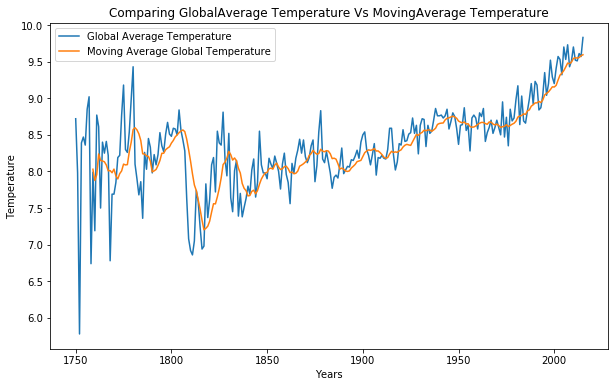

In [28]:
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = "year", y = "avg_temp", data= df_global, label = "Global Average Temperature")
sns.lineplot(x = "year", y = "moving_averages", data= df_global, label = "Moving Average Global Temperature")
ax.legend()
ax.set_ylabel("Temperature")
ax.set_xlabel("Years")
ax.set_title("Comparing GlobalAverage Temperature Vs MovingAverage Temperature")

### Plotting the line-graphs between Kathmandu average temperature and it's moving average 

Text(0.5, 1.0, "Comparing Kathmandu's Average Vs Its Moving Average Temperature")

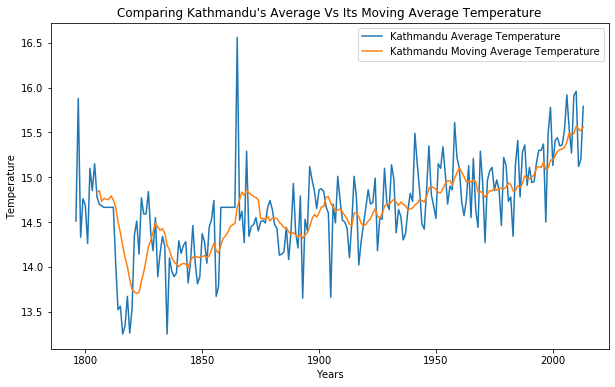

In [29]:
# fig.savefig('global vs moving average', dpi= 100)
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(x = "year", y = "avg_temp", data= df_kathmandu, label= "Kathmandu Average Temperature")
sns.lineplot(x = "year", y = "moving_averages", data = df_kathmandu, label = "Kathmandu Moving Average Temperature")
ax.legend()
ax.set_ylabel("Temperature")
ax.set_xlabel("Years")
ax.set_title("Comparing Kathmandu's Average Vs Its Moving Average Temperature")

### Plotting the line-graphs between global moving average and kathmandu moving average

Text(0.5, 1.0, "Global Moving Average Vs Kathmandu's Moving Averages")

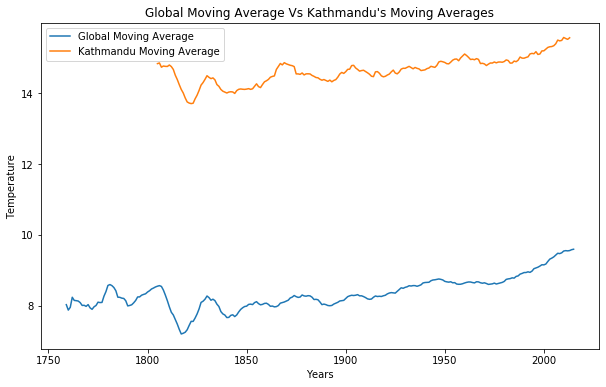

In [30]:
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = "year", y = "moving_averages", data= df_global, label= "Global Moving Average")
sns.lineplot(x = "year", y = "moving_averages", data = df_kathmandu, label = "Kathmandu Moving Average")
ax.legend()
ax.set_ylabel("Temperature")
ax.set_xlabel("Years")
ax.set_title("Global Moving Average Vs Kathmandu's Moving Averages")

### Plotting the linear trends of the moving averages

In [31]:
X_global = np.array(df_global["year"]).reshape(-1,1)
y_global = np.array(df_global["avg_temp"]).reshape(-1,1)
model_global = LinearRegression().fit(X= X_global, y= y_global)
trend_global = model_global.predict(X_global)

In [32]:
X_ktm = np.array(df_kathmandu["year"]).reshape(-1,1)
y_ktm = np.array(df_kathmandu["avg_temp"]).reshape(-1,1)
model_ktm = LinearRegression().fit(X= X_ktm, y= y_ktm)
trend_ktm = model_ktm.predict(X_ktm)

Text(0.5, 1.0, "Global Moving Average Vs Kathmandu's Moving Averages")

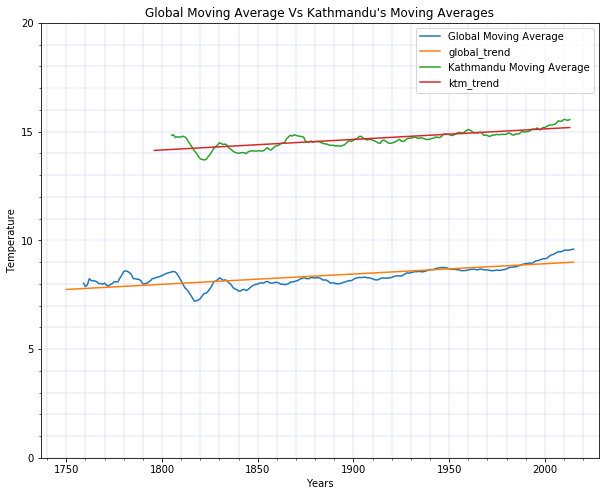

In [59]:
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(x = "year", y = "moving_averages", data= df_global, label= "Global Moving Average")
ax.plot( X_global, trend_global, label= "global_trend")

sns.lineplot(x = "year", y = "moving_averages", data = df_kathmandu, label = "Kathmandu Moving Average")
ax.plot(X_ktm, trend_ktm, label = "ktm_trend")
ax.set_xticks(np.arange(1750, 2030, 50))
ax.set_yticks(np.arange(0, 25, 5))
ax.minorticks_on()
ax.grid(which = 'both',color = 'b', linestyle='-', linewidth= 0.1, )
ax.legend()
ax.set_ylabel("Temperature")
ax.set_xlabel("Years")
ax.set_title("Global Moving Average Vs Kathmandu's Moving Averages")

## Observations
- There is an upward trend for both the global average and kathmandu's average temperature.
- Kathmandu's average temperaure looks clearly hotter than the global average temperature in last 200 years.
- Both has the lowest recorded temperature in between 1815-1825 and highest recorded temperature in 2013-2015.That means the effect of the global warming is being felt on earth.
- In a period of 200 years, there is a little more than 1 degree celsius increment in temperature of earth and Kathmandu city.
- With a correlation of 0.71, Kathmandu city shows similar pattern of moving averages with global moving averages clearly indicating that it has felt the effect of global temperature. This may be caused by the presence of Himalayan range in Nepal, consisting 8 out of top 10 highest peaks in the world, which has melted due to global warming in last 200 years.
- kathmandu's temperature had almost stagnant temperature in between 1950 and 1990, while the global temperature was increasing in the same period.